In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib notebook
sns.set()

In [2]:
df = pd.read_csv('Gold_prices.csv')
df = df[df.columns[~df.columns.str.contains('Unnamed:')]]
df.columns = ['Date', 'Price']
df.head()


,Date,Price
0,03-01-1997,"13,064.0"
1,06-01-1997,"12,863.0"
2,07-01-1997,"12,886.3"
3,08-01-1997,"12,793.0"
4,09-01-1997,"12,788.9"


In [3]:
x = [i for i in range(0,len(df['Price']))] 

In [4]:
print(df['Price'])


0       13,064.0
1       12,863.0
2       12,886.3
3       12,793.0
4       12,788.9
5       12,843.3
6       12,895.2
7       12,812.2
8       12,706.5
9       12,659.5
10      12,752.6
11      12,658.6
12      12,718.1
13      12,592.6
14      12,468.8
15      12,635.4
16      12,674.8
17      12,684.6
18      12,590.4
19      12,531.1
20      12,394.8
21      12,350.0
22      12,391.6
23      12,319.5
24      12,296.2
25      12,181.7
26      12,208.4
27      12,172.6
28      12,111.6
29      12,313.8
          ...   
5466    80,924.2
5467    80,755.3
5468    81,041.8
5469    81,027.6
5470    81,022.9
5471    81,022.9
5472    81,070.3
5473    82,087.9
5474    82,761.2
5475    82,401.3
5476    82,401.3
5477    83,245.3
5478    83,548.7
5479    83,334.4
5480    83,462.8
5481    83,674.9
5482    83,495.9
5483    83,944.3
5484    84,228.6
5485    84,417.6
5486    84,983.8
5487    85,426.4
5488    85,296.3
5489    85,046.0
5490    85,149.8
5491    85,084.8
5492    85,064.2
5493    86,195

In [5]:
new_price = []
for i in df['Price']:
    i = i[:2]+i[3:8]
    i = float(i)
    new_price.append(i)    
type(new_price[0])

float

In [6]:
#price = df['Price'].tolist()

In [7]:
df['Price'] = new_price

In [8]:
(df['Date'][17])

'28-01-1997'

In [9]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df['Date'][2]

Timestamp('1997-01-07 00:00:00')

<IPython.core.display.Javascript object>


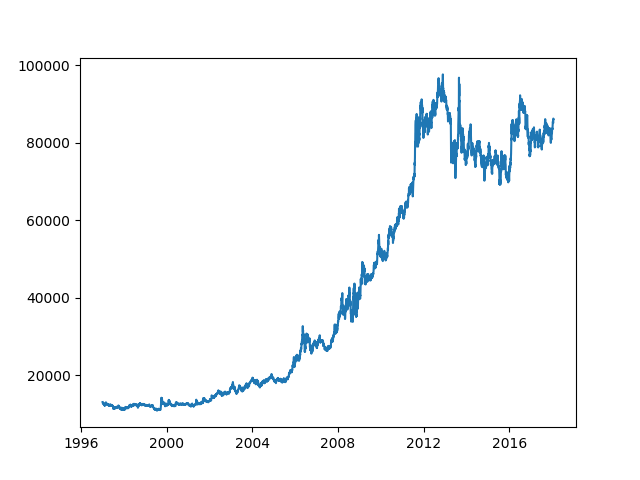

In [11]:
plt.figure(1)
plt.plot(df['Date'], df['Price'])
plt.show()

In [12]:
uniq_date =[]
a=1997

while(a<2018):
    for i in range(len(df['Date'])):
        if str(df['Date'][i]).startswith(str(a)+"-08"):
            uniq_date.append(df['Price'][i])
            break
    a += 1


In [13]:
year = []
for i in range(1997,2018):
    year.append(i)


In [14]:
slope = []
for i in range(len(uniq_date)-1):
    slope.append(uniq_date[i+1]-uniq_date[i])
slope.insert(0,0.000000)


In [15]:

df1 = pd.DataFrame(data={'Year':year, 'Price':uniq_date, 'Slope':slope})
df1 = df1[['Year', 'Slope', 'Price']]


In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(df1['Year'].reshape(-1,1), df1['Price'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [17]:
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

(poly deg 2) linear model coeff (w):
[ 4544.82623377]
(poly deg 2) linear model intercept (b): -9079392.280


In [18]:
pred_prices = []
year = []
for x in range(2022,2023):
    year.append(x)
    pred_prices.append(linreg.predict(x))
year,pred_prices



([2022], [array([ 110246.36493506])])

<IPython.core.display.Javascript object>


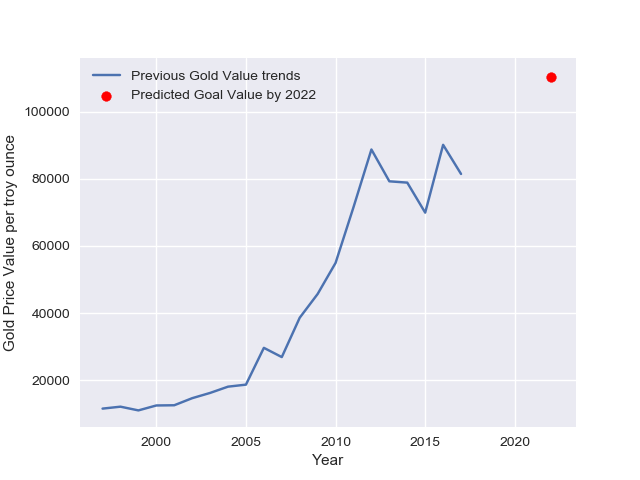

In [26]:
plt.figure(2)
plt.plot(df1['Year'], df1['Price'], label = 'Previous Gold Value trends')
plt.scatter(year,pred_prices, c='r', label= 'Predicted Goal Value by 2022')
plt.legend()

plt.xlabel("Year")
plt.ylabel("Gold Price Value per troy ounce")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()